In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
loan_data = loan_data_backup.copy()

In [4]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data['issue_d_date']= pd.to_datetime(loan_data['issue_d'],format='%b-%y')

In [6]:
loan_data['last_pymnt_d_date']= pd.to_datetime(loan_data['last_pymnt_d'],format='%b-%y')
loan_data['loan_active_mths'] =round(pd.to_numeric((loan_data['last_pymnt_d_date']- loan_data['issue_d_date'])/np.timedelta64(1,'M')))

In [7]:
loan_data['term']=pd.to_numeric(loan_data['term'].str.replace(" months",""))

In [8]:
loan_data["prepayment"] = loan_data['term']-loan_data['loan_active_mths']

In [9]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [10]:
#Add new Prepaid loan status 
loan_data['loan_status'] = np.where((loan_data["loan_status"]=="Fully Paid")&(loan_data["prepayment"]>0),'Prepaid',loan_data["loan_status"])

In [11]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Prepaid', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [12]:
#All funded amount grouped by issue date
df5=loan_data['funded_amnt'].groupby(loan_data['issue_d_date']).sum()

In [13]:
df_prepaid = loan_data[loan_data['loan_status']=='Prepaid']

In [14]:
df_prepaid[['funded_amnt','last_pymnt_d_date','issue_d_date','loan_active_mths']].head()

,funded_amnt,last_pymnt_d_date,issue_d_date,loan_active_mths
2,2400,2014-06-01,2011-12-01,30.0
10,6500,2013-06-01,2011-12-01,18.0
11,12000,2013-09-01,2011-12-01,21.0
17,3600,2013-05-01,2011-12-01,17.0
19,9200,2012-07-01,2011-12-01,7.0


In [15]:
df_prepaid_pivot = df_prepaid.pivot_table(index='loan_active_mths', columns='issue_d_date', values='funded_amnt')
df_prepaid_pivot.fillna(0, inplace=True)

In [16]:
df_final = df_prepaid_pivot.copy()

In [17]:
df5 = pd.DataFrame(df5)

In [18]:
df5.columns.values

array(['funded_amnt'], dtype=object)

In [19]:
for date in df_final.columns.values:
    str_date = str(date)[0:10]
    df_final[str_date]=df_final[str_date]/df5.loc[str_date].values[0]

In [20]:
df_cumsum_prepaid = df_final.cumsum(axis=0)

In [21]:
df_cumsum_prepaid.head()

issue_d_date,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,2008-04-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
loan_active_mths,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000018,0.000094,0.000019,0.000029,0.000073
1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.002033,0.000482,0.003147,...,0.000053,0.000047,0.000046,0.000047,0.000032,0.000062,0.000182,0.000041,0.000064,0.000156
2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000844,0.003727,0.000482,0.003147,...,0.000113,0.000094,0.000091,0.000093,0.000062,0.000109,0.000259,0.000064,0.000102,0.000228
3.0,0.0,0.0,0.0,0.010452,0.008033,0.000000,0.000844,0.008471,0.002169,0.010050,...,0.000168,0.000145,0.000140,0.000150,0.000095,0.000159,0.000354,0.000088,0.000138,0.000328
4.0,0.0,0.0,0.0,0.010452,0.008033,0.004378,0.003515,0.010627,0.003422,0.010050,...,0.000225,0.000197,0.000189,0.000202,0.000127,0.000207,0.000443,0.000112,0.000174,0.000424


Text(0.5, 1.0, 'Vintage Analysis for Prepayment')

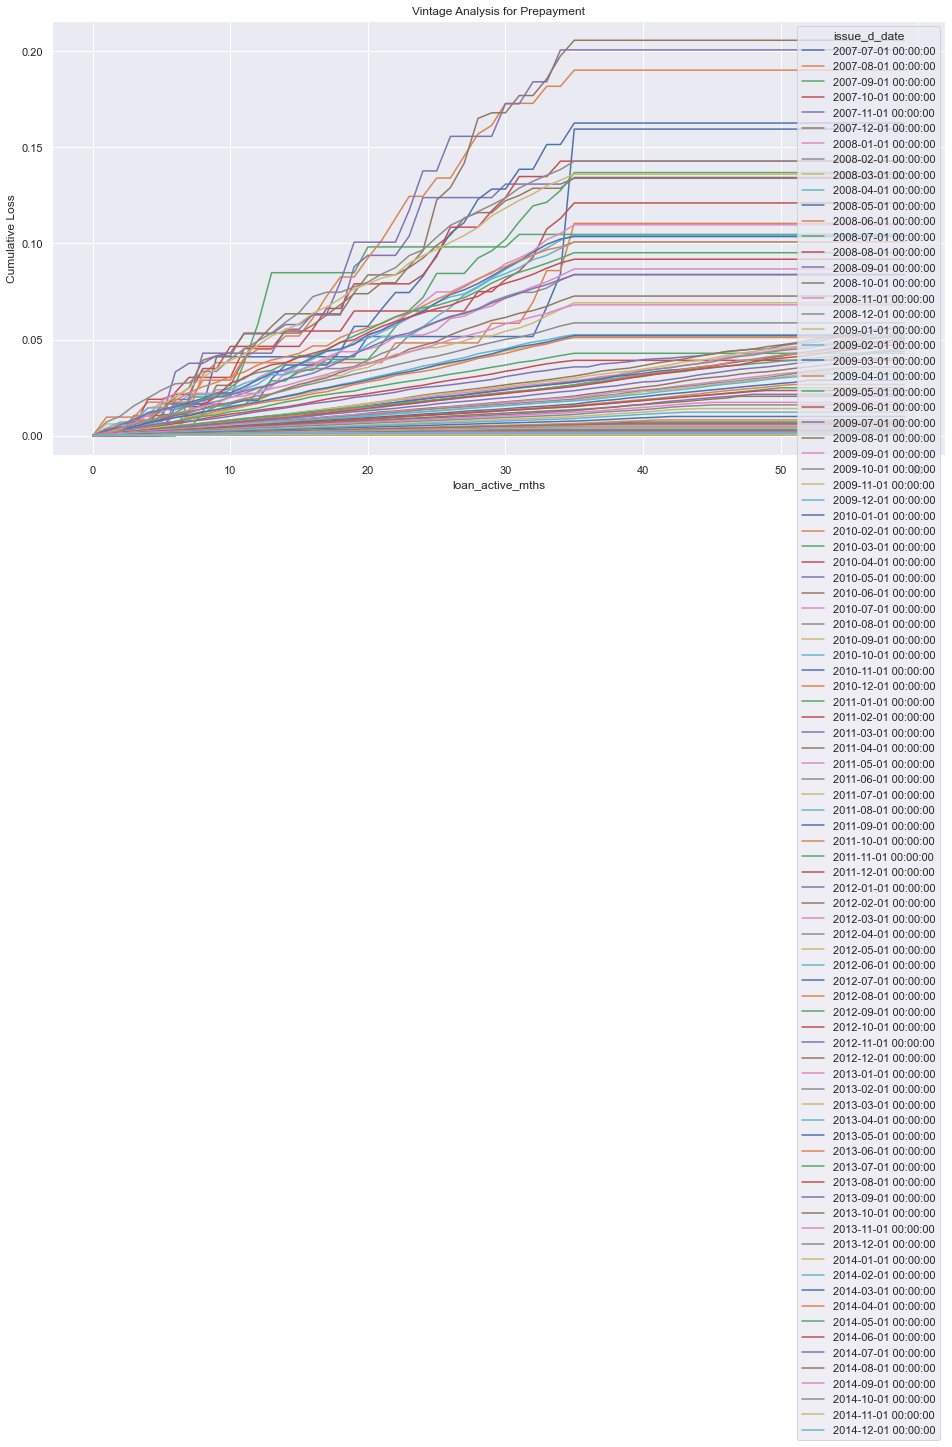

In [22]:
df_cumsum_prepaid.plot(legend=True, figsize=(16,8))
plt.ylabel('Cumulative Loss Rate')
plt.title('Vintage Analysis for Prepayment')

Vintage Analysis for Default


In [23]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Prepaid', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [24]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']), 0, 1)

In [25]:
df_default = loan_data[loan_data['good_bad']==0]

In [26]:
df_default.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [27]:
df_default[['funded_amnt','total_pymnt','total_rec_prncp', 'total_rec_int','recoveries','issue_d_date','last_pymnt_d_date', 'loan_active_mths','loan_status']]

,funded_amnt,total_pymnt,total_rec_prncp,total_rec_int,recoveries,issue_d_date,last_pymnt_d_date,loan_active_mths,loan_status
1,2500,1008.71,456.46,435.17,117.08,2011-12-01,2013-04-01,16.0,Charged Off
8,5600,646.02,162.02,294.94,189.06,2011-12-01,2012-04-01,4.0,Charged Off
9,5375,1476.19,673.48,533.42,269.29,2011-12-01,2012-11-01,11.0,Charged Off
12,9000,2270.70,1256.14,570.26,444.30,2011-12-01,2012-07-01,7.0,Charged Off
14,10000,7471.99,5433.47,1393.42,645.10,2011-12-01,2013-10-01,22.0,Charged Off
...,...,...,...,...,...,...,...,...,...
466254,6000,511.49,163.71,347.78,0.00,2014-01-01,2014-04-01,3.0,Charged Off
466256,15000,5347.10,3436.71,1910.39,0.00,2014-01-01,2014-11-01,10.0,Charged Off
466276,8525,2029.93,360.08,510.45,1159.40,2014-01-01,2014-05-01,4.0,Charged Off
466277,18000,5631.67,4580.89,1050.78,0.00,2014-01-01,2014-11-01,10.0,Charged Off


In [28]:
df_default['funded_amnt'].astype(float)

1          2500.0
8          5600.0
9          5375.0
12         9000.0
14        10000.0
           ...   
466254     6000.0
466256    15000.0
466276     8525.0
466277    18000.0
466281    22000.0
Name: funded_amnt, Length: 50968, dtype: float64

In [29]:
df_default['total_rec_prncp']

1          456.46
8          162.02
9          673.48
12        1256.14
14        5433.47
           ...   
466254     163.71
466256    3436.71
466276     360.08
466277    4580.89
466281    1837.04
Name: total_rec_prncp, Length: 50968, dtype: float64

In [30]:
#Add Loan balance column
df_default['loan_balance']=df_default['funded_amnt'].astype(float)-df_default['total_rec_prncp']-df_default['recoveries']

<ipython-input-30-8d918df12186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_default['loan_balance']=df_default['funded_amnt'].astype(float)-df_default['total_rec_prncp']-df_default['recoveries']


In [31]:
df_default_pivot = df_default.pivot_table(index='loan_active_mths', columns='issue_d_date', values='loan_balance')
df_default_pivot.fillna(0, inplace=True)

In [32]:
df_default_pivot.head()

issue_d_date,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
loan_active_mths,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,0.000,0.00,-1186.120000,...,10400.745417,13391.101500,12162.014516,12349.433182,12227.981818,11368.585000,17046.500000,12293.110930,11327.664231,12988.582500
2.0,0.0,0.0,0.0,0.00,4541.070000,8563.91,13692.33,4494.110,15028.96,10855.825000,...,11279.773871,13669.392813,13225.131852,11465.870000,13302.542581,12098.445556,14436.261923,10472.985068,12644.472273,14077.880952
3.0,0.0,0.0,0.0,0.00,3727.440000,7862.20,0.00,9892.400,8981.11,14837.675000,...,12285.208056,12555.002586,11124.886038,12936.312759,14434.706333,12264.076863,13557.077436,12039.677692,14117.397288,13762.212400
4.0,0.0,0.0,0.0,3979.93,997.525000,0.00,0.00,9100.065,21934.63,8006.843333,...,11845.189655,13050.363867,12354.254533,12679.522055,12504.028889,12033.522769,12742.637105,11686.127556,12063.660482,14124.748889
5.0,0.0,0.0,0.0,0.00,7955.703333,0.00,7087.59,13320.965,9102.21,8079.290000,...,12099.946087,12357.432895,13332.111647,13283.684630,13299.350000,12783.659014,11789.783158,12212.094910,12792.567885,15652.366944


In [33]:
df_final2 = df_default_pivot.copy()

In [34]:
for date in df_final2.columns.values:
    str_date = str(date)[0:10]
    df_final2[str_date]=df_final2[str_date]/df5.loc[str_date].values[0]

In [35]:
df_final2.head()

issue_d_date,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
loan_active_mths,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000286,...,0.000042,0.000048,0.000043,0.000048,0.000028,0.000040,0.000107,0.000022,0.000030,0.000082
2.0,0.0,0.0,0.0,0.000000,0.006650,0.008599,0.007494,0.001548,0.005092,0.002616,...,0.000046,0.000049,0.000047,0.000045,0.000031,0.000043,0.000091,0.000018,0.000034,0.000089
3.0,0.0,0.0,0.0,0.000000,0.005458,0.007894,0.000000,0.003409,0.003043,0.003575,...,0.000050,0.000045,0.000040,0.000051,0.000033,0.000044,0.000085,0.000021,0.000038,0.000087
4.0,0.0,0.0,0.0,0.010671,0.001461,0.000000,0.000000,0.003136,0.007432,0.001929,...,0.000048,0.000046,0.000044,0.000050,0.000029,0.000043,0.000080,0.000020,0.000032,0.000089
5.0,0.0,0.0,0.0,0.000000,0.011650,0.000000,0.003879,0.004590,0.003084,0.001947,...,0.000049,0.000044,0.000048,0.000052,0.000031,0.000045,0.000074,0.000021,0.000034,0.000099


In [36]:
df_cumsum_default = df_final2.cumsum(axis=0)

In [37]:
df_cumsum_default.head()

issue_d_date,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
loan_active_mths,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000286,...,0.000042,0.000048,0.000043,0.000048,0.000028,0.000040,0.000107,0.000022,0.000030,0.000082
2.0,0.0,0.0,0.0,0.000000,0.006650,0.008599,0.007494,0.001548,0.005092,0.002330,...,0.000088,0.000096,0.000090,0.000093,0.000059,0.000083,0.000197,0.000040,0.000064,0.000171
3.0,0.0,0.0,0.0,0.000000,0.012108,0.016493,0.007494,0.004957,0.008136,0.005905,...,0.000138,0.000141,0.000130,0.000144,0.000092,0.000127,0.000282,0.000061,0.000102,0.000258
4.0,0.0,0.0,0.0,0.010671,0.013569,0.016493,0.007494,0.008093,0.015568,0.007835,...,0.000186,0.000187,0.000174,0.000193,0.000121,0.000170,0.000362,0.000081,0.000134,0.000347
5.0,0.0,0.0,0.0,0.010671,0.025219,0.016493,0.011372,0.012682,0.018652,0.009781,...,0.000236,0.000231,0.000222,0.000245,0.000152,0.000215,0.000436,0.000103,0.000169,0.000446


Text(0.5, 1.0, 'Vintage Analysis for Default')

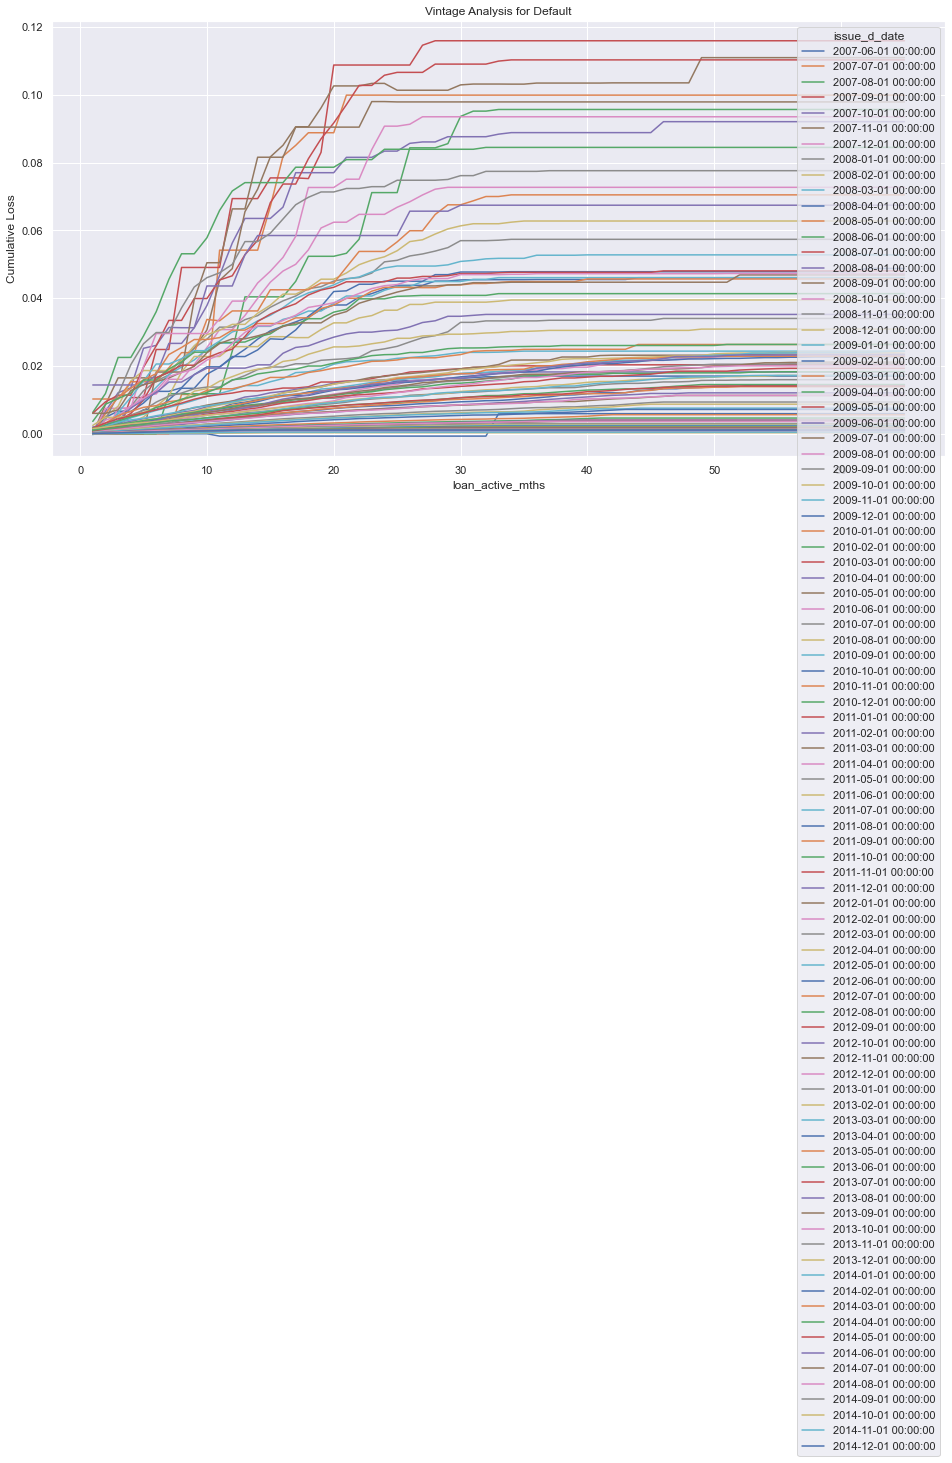

In [38]:
df_cumsum_default.plot(legend=True, figsize=(16,8))
plt.ylabel('Cumulative Loss Rate')
plt.title('Vintage Analysis for Default')